In [1]:
from collections import defaultdict
# 너무 많이 사용된 단어들이나 너무 적게 사용된 단어들을 제거하기 위한 함수
def get_filtered_words(docs):
    term_fre_dict = defaultdict(int)
    doc_fre_dict = defaultdict(int)
    
    for doc in docs:
        for word in doc:
            term_fre_dict[word] += 1
        for word in set(doc):
            doc_fre_dict[word] += 1
    
    max_doc_frequency = 1000
    min_doc_frequency = 3
    max_term_frequency = 7000
    min_term_frequency = 5
    
    doc_frequency_filtered = {k:v for k, v in doc_fre_dict.items() if ((v>=min_doc_frequency) and (v <= max_doc_frequency))}
    term_frequency_filtered = {k:v for k, v in term_fre_dict.items() if ((v>=min_term_frequency) and (v <= max_term_frequency))}
    both_satisfied = {k:v for k, v in term_frequency_filtered.items() if k in doc_frequency_filtered}
    
    return both_satisfied

In [2]:
# 문서별 주제 분포에서 확률이 가장 높은 주제를 출력하기 위한 함수
def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

In [4]:
# 명사 단어를 추출하기 위한 함수
def get_noun_words(morphs):
    Noun_words = []
    for word, tag in morphs:
        if tag == 'Noun':
            Noun_words.append(word)
    return Noun_words

### 데이터 읽어오기

In [5]:
import pickle
total_morphs = pickle.load(open('total_sections_morphs.p','rb'))  
# 정치, 경제, 사회 섹션의 기사 
# 사람들이 많이 본 순 하루 30개, 3달 기간

In [6]:
total_morphs['001-0008403019'].keys()

dict_keys(['text_title', 'paper_id', 'content'])

In [7]:
len(total_morphs)

7837

In [8]:
# 3가지 정보를 별도 리스트 변수에 저장
documents =[]
article_ids = []
text_titles = []
for key in total_morphs:
    documents.append(get_noun_words(total_morphs[key]['content'])) # 명사만 추출
    article_ids.append(total_morphs[key]['paper_id'])
    text_titles.append(total_morphs[key]['text_title'])

In [9]:
print(documents[0])

['매출', '기준', '천', '개사', '조사', '억대', '연봉', '곳', '서울', '연합뉴스', '옥철', '기자', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '해', '천', '만원', '정도', '더', '버', '것', '이', '기준', '대기업', '평균', '연봉', '천', '만원', '중소기업', '천', '만원', '중소기업', '연봉', '대기업', '수준', '지난해', '국내', '천대', '기업', '중', '직원', '억대', '연봉', '손', '쥐', '여준', '기업', '모두', '곳', '집계', '장기', '불황', '전년', '곳', '대비', '크게', '일', '한국', '만', '기업', '연구소', '소장', '오일', '선', '최근', '년', '매출', '기준', '국내', '천대', '기업', '직원', '평균', '보수', '를', '자료', '지난해', '천대', '기업', '평균', '연봉', '천', '만원', '조사', '월급', '만원', '꼴', '평균', '연봉', '전년', '이번', '조사', '사업', '보고서', '상장', '비상', '장사', '매출', '기준', '분류', '천대', '기업', '가운데', '매출', '액', '순위', '상위', '기업', '직원', '평균', '연봉', '천', '만원', '하위', '기업', '직원', '평균', '연봉', '천', '만원', '천', '만원', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '조사', '결과', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '천', '만원', '더', '것', '집계', '대기업', '직원', '한해', '천', '만원', '월', '만원', '때', '중소기업', '직원', '천', '만원', '월', '만원', '얘기'

In [10]:
#불용어 제거 =>  빈도 기준
both_satisfied = get_filtered_words(documents)

In [11]:
# 사용자 불용어 사전을 별도 파일로 저장
f_stop = open('stop_words.txt', 'r', encoding='utf-8')
stop_words = [word.strip() for word in f_stop.readlines()]
f_stop.close()

In [12]:
# 불용어 제거 => 불용어 사전 + 1음절 단어 + 빈도 기준
docs_filtered = [[term for term in doc if term in both_satisfied and term not in stop_words and len(term)>1] for doc in documents]

In [13]:
print(docs_filtered[0])

['매출', '개사', '억대', '연봉', '옥철', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '대기업', '평균', '연봉', '중소기업', '중소기업', '연봉', '대기업', '천대', '직원', '억대', '연봉', '여준', '집계', '장기', '불황', '전년', '대비', '크게', '연구소', '소장', '오일', '매출', '천대', '직원', '평균', '보수', '천대', '평균', '연봉', '월급', '평균', '연봉', '전년', '보고서', '상장', '비상', '장사', '매출', '분류', '천대', '매출', '순위', '상위', '직원', '평균', '연봉', '하위', '직원', '평균', '연봉', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '집계', '대기업', '직원', '한해', '중소기업', '직원', '얘기', '대기업', '직원', '보수', '치면', '중소기업', '직원', '연봉', '전년', '격차', '약간', '대기업', '중소기업', '임금', '격차', '연구소', '오일', '소장', '매출', '이익', '업종', '달라', '보수', '격차', '현실', '중소기업', '보수', '대기업', '우수', '인재', '대기업', '몰리', '쏠림', '현상', '완화', '작년', '중소기업', '대기업', '연봉', '연봉', '천만원', '단위', '천만원', '평균', '보수', '다음', '천만원', '업종', '별로', '정유', '전기', '화학', '업종', '직원', '평균', '보수', '정유', '단연', '최고', '정유', '평균', '보수', '전년', '정유', '보고서', '평균', '연봉', '추이', '에너지', '작년', '칼텍스', '에쓰오일', '

In [14]:
from gensim.corpora import Dictionary
dictionary = Dictionary(docs_filtered)
DTM = []
for doc in docs_filtered:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [15]:
print(dictionary.token2id)

{'각각': 0, '개사': 1, '건설': 2, '격차': 3, '고액': 4, '다음': 5, '단연': 6, '단위': 7, '달라': 8, '대기업': 9, '대비': 10, '롯데': 11, '매출': 12, '몰리': 13, '미만': 14, '반면': 15, '별로': 16, '보고서': 17, '보수': 18, '분류': 19, '불황': 20, '비상': 21, '상대': 22, '상위': 23, '상장': 24, '상향': 25, '석유화학': 26, '소장': 27, '수가': 28, '순위': 29, '스톡옵션': 30, '식품': 31, '쏠림': 32, '약간': 33, '얘기': 34, '억대': 35, '업종': 36, '에너지': 37, '에쓰오일': 38, '여준': 39, '연구소': 40, '연봉': 41, '영세': 42, '오일': 43, '옥철': 44, '완화': 45, '우수': 46, '월급': 47, '유통': 48, '유화': 49, '이익': 50, '인재': 51, '인천': 52, '임금': 53, '작년': 54, '장기': 55, '장사': 56, '전기': 57, '전년': 58, '전자': 59, '정밀': 60, '정유': 61, '제약': 62, '조원': 63, '종합': 64, '중소기업': 65, '직원': 66, '집계': 67, '천대': 68, '천만원': 69, '천억원': 70, '최고': 71, '추이': 72, '치면': 73, '칼텍스': 74, '코스닥': 75, '크게': 76, '토탈': 77, '파악': 78, '평균': 79, '풀이': 80, '하위': 81, '한해': 82, '한화': 83, '현상': 84, '현실': 85, '화학': 86, '효과': 87, '가격': 88, '가입': 89, '가입자': 90, '가지': 91, '강원도': 92, '게티': 93, '경기도': 94, '고양시': 95, '곳도': 96, '공사': 97, '광역시': 98

In [17]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(DTM))

Number of unique tokens: 17702
Number of documents: 7837


In [ ]:
len(DTM[0])

In [48]:
print(DTM[0])

[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 11), (10, 1), (11, 1), (12, 9), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 10), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 3), (36, 4), (37, 1), (38, 1), (39, 1), (40, 2), (41, 18), (42, 1), (43, 2), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 4), (59, 2), (60, 1), (61, 4), (62, 1), (63, 2), (64, 1), (65, 10), (66, 17), (67, 2), (68, 5), (69, 6), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 18), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 4), (87, 1)]


In [18]:
from gensim import models

In [19]:
NUM_TOPICS = 30 # 찾고자 하는 주제의 수

In [20]:
lda_model = models.ldamodel.LdaModel(corpus=DTM, num_topics=NUM_TOPICS,
                        id2word=dictionary, alpha='auto', eta='auto', iterations = 1000)

In [21]:
TOPIC_ID = 0
NUM_TOPIC_WORDS = 5
lda_model.show_topic(TOPIC_ID, NUM_TOPIC_WORDS)

[('사고', 0.013761124),
 ('안전', 0.013176462),
 ('메트로', 0.0077057527),
 ('서울시', 0.0070859757),
 ('업무', 0.0062752287)]

In [23]:
for topic_id in range(lda_model.num_topics):
    word_probs = lda_model.show_topic(topic_id, NUM_TOPIC_WORDS)
    print("Topic ID: {}".format(topic_id))
    for word, prob in word_probs:
        print("\t{}\t{}".format(word, prob))
    print("\n")

Topic ID: 0
	사고	0.013761123642325401
	안전	0.013176461681723595
	메트로	0.0077057527378201485
	서울시	0.0070859757252037525
	업무	0.006275228690356016


Topic ID: 1
	어선	0.028653325513005257
	조업	0.01748138852417469
	편의점	0.011612193658947945
	불법	0.01029233168810606
	한강	0.010157668963074684


Topic ID: 2
	은행	0.014958738349378109
	카드	0.009008621796965599
	금융	0.008032288402318954
	거부권	0.007889225147664547
	계좌	0.007351243402808905


Topic ID: 3
	가격	0.01578165777027607
	달러	0.013525932095944881
	영국	0.012684051878750324
	브렉	0.011089811101555824
	시트	0.011056199669837952


Topic ID: 4
	회장	0.01949721947312355
	범행	0.009746717289090157
	살해	0.007632422726601362
	공개	0.007178413216024637
	롯데	0.0069426968693733215


Topic ID: 5
	천억원	0.013527820818126202
	은행	0.008866267278790474
	지원	0.008780437521636486
	근로자	0.008647429756820202
	조원	0.008122789673507214


Topic ID: 6
	검찰	0.03822776675224304
	롯데	0.03630823269486427
	그룹	0.01569090038537979
	의혹	0.014119996689260006
	사장	0.012149741873145103


Topic ID: 7
	새누리당	0.01288

In [24]:
# 문서별 주제 분포 확인하기
for i in range(10):
    print(article_ids[i])
    print(text_titles[i])
    topics_list = lda_model.get_document_topics(DTM[i], minimum_probability=0.1)
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list) # 가장 확률이 높은 주제를 출력합니다.
    print('The most covered topic is Topic {0} and percentage is {1:.2f}'.format(hi_topic, hi_prob), '\n')


001-0008427957
대기업 연봉 6천700만원…中企보다 2천500만원 더 …
[(0, 0.114751674), (5, 0.18255098), (9, 0.14352661), (15, 0.16852552), (23, 0.34462115)]
The most covered topic is Topic 23 and percentage is 0.34 

016-0001073431
［주택연금의 경제학①］불안한 노후…주택연금 창…
[(3, 0.47459006), (6, 0.120413244), (9, 0.3128262)]
The most covered topic is Topic 3 and percentage is 0.47 

025-0002623216
이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
[(9, 0.42885372), (24, 0.38261107)]
The most covered topic is Topic 9 and percentage is 0.43 

020-0002986787
[단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
[(16, 0.8627695)]
The most covered topic is Topic 16 and percentage is 0.86 

025-0002626012
[카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
[(3, 0.7046902), (21, 0.17777555)]
The most covered topic is Topic 3 and percentage is 0.70 

001-0008400554
'간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
[(4, 0.12606707), (13, 0.115094215), (26, 0.23601311), (28, 0.32286823)]
The most covered topic is Topic 28 and percentage is 0.32 

001-0008471993
미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
[(4, 0.16237304), (24, 0.57

# Log perplexity

In [22]:
lda_model.log_perplexity(corpus)

-8.4893895927562

In [69]:
start1 = 21
limit1 = 63
step1 = 3
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(DTM, num_topics=num_topics,
                    id2word=dictionary, alpha='auto', eta='auto', iterations=100)
    perplexity_scores.append(model.log_perplexity(DTM))


In [29]:
import matplotlib.pyplot as plt

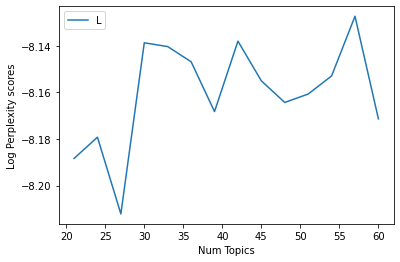

In [70]:
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

### Coherence 계산하기

In [25]:
from gensim.models import CoherenceModel

In [34]:
def compute_coherence_values_umass(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='u_mass', topn=30)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [35]:
start1 = 3
limit1 = 63
step1 = 3
coherence_values_umass = compute_coherence_values_umass(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

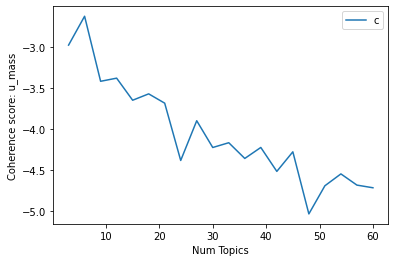

In [36]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [40]:
def compute_coherence_values_cv(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='c_v', topn=20)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [41]:
coherence_values_cv = compute_coherence_values_cv(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

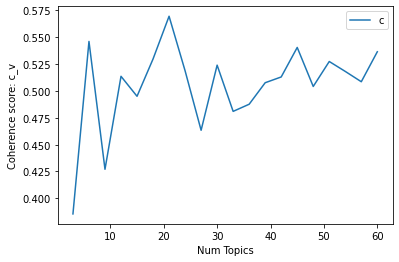

In [42]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAvis를 이용해서 시각화해 보기

In [85]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

C:\Users\user\anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')
C:\Users\user\anaconda3\lib\site-packages\numexpr\expressions.py:21: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_forbids_neg_powint = LooseVersion(numpy.__version__) >= LooseVersion('1.12.0b1')


In [86]:
prepared_data = gensimvis.prepare(lda_model, DTM, dictionary)

In [ ]:
pyLDAvis.display(prepared_data)

In [88]:
pyLDAvis.save_html(prepared_data, 'LDAvis.html')

## 문서별 주제 분포를 이용한 문서 간의 유사도 파악하기

In [95]:
# get_document_topics() => 문서별 주제 분포 반환
doc1 = lda_model.get_document_topics(DTM[0], minimum_probability=0.0)

In [96]:
print(doc1)

[(0, 0.00016805656), (1, 0.00014913135), (2, 0.00015200555), (3, 0.00018420766), (4, 0.00016572209), (5, 0.11520963), (6, 0.00015652888), (7, 0.00014418554), (8, 0.00016303001), (9, 0.00013972867), (10, 0.00015133792), (11, 0.00014690636), (12, 0.5234521), (13, 0.00013990977), (14, 0.00013269107), (15, 0.00017301779), (16, 0.0001759923), (17, 0.00016074917), (18, 0.00017308356), (19, 0.00017595076), (20, 0.00014734041), (21, 0.0963151), (22, 0.20715506), (23, 0.00013447105), (24, 0.00017029564), (25, 0.00014358026), (26, 0.053989064), (27, 0.00014229042), (28, 0.00014252153), (29, 0.00014626408)]


In [97]:
doc1_vec = [prob for k, prob in doc1]

In [98]:
print(doc1_vec)

[0.00016805656, 0.00014913135, 0.00015200555, 0.00018420766, 0.00016572209, 0.11520963, 0.00015652888, 0.00014418554, 0.00016303001, 0.00013972867, 0.00015133792, 0.00014690636, 0.5234521, 0.00013990977, 0.00013269107, 0.00017301779, 0.0001759923, 0.00016074917, 0.00017308356, 0.00017595076, 0.00014734041, 0.0963151, 0.20715506, 0.00013447105, 0.00017029564, 0.00014358026, 0.053989064, 0.00014229042, 0.00014252153, 0.00014626408]


In [99]:
import numpy as np

In [100]:
doc1_vec=np.array(doc1_vec)

In [101]:
doc1_vec

array([1.6805656e-04, 1.4913135e-04, 1.5200555e-04, 1.8420766e-04,
       1.6572209e-04, 1.1520963e-01, 1.5652888e-04, 1.4418554e-04,
       1.6303001e-04, 1.3972867e-04, 1.5133792e-04, 1.4690636e-04,
       5.2345210e-01, 1.3990977e-04, 1.3269107e-04, 1.7301779e-04,
       1.7599230e-04, 1.6074917e-04, 1.7308356e-04, 1.7595076e-04,
       1.4734041e-04, 9.6315101e-02, 2.0715506e-01, 1.3447105e-04,
       1.7029564e-04, 1.4358026e-04, 5.3989064e-02, 1.4229042e-04,
       1.4252153e-04, 1.4626408e-04], dtype=float32)

In [102]:
doc2 = lda_model.get_document_topics(corpus[1], minimum_probability=0.0)
doc3 = lda_model.get_document_topics(corpus[2], minimum_probability=0.0)
doc2_vec = [prob for k, prob in doc2]
doc3_vec = [prob for k, prob in doc3]
doc2_vec=np.array(doc2_vec)
doc3_vec=np.array(doc3_vec)

In [105]:
for k in range(3):
    print('문서 {0}의 제목: {1}'.format(k+1, text_titles[k]))

문서 1의 제목: 대기업 연봉 6천700만원…中企보다 2천500만원 더 …
문서 2의 제목: ［주택연금의 경제학①］불안한 노후…주택연금 창…
문서 3의 제목: 이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…


In [106]:
print(np.dot(doc1_vec, doc2_vec)/(np.linalg.norm(doc1_vec)*np.linalg.norm(doc2_vec)))
print(np.dot(doc1_vec, doc3_vec)/(np.linalg.norm(doc1_vec)*np.linalg.norm(doc3_vec)))

0.044665776
0.00071347295


## 문서별 주제 벡터를 사용해서 군집화 해보기

In [108]:
topic_results=lda_model.get_document_topics(DTM, minimum_probability=0.0)

In [109]:
topic_DTM =[]
for k in range(len(topic_results)):
    topic_vector = [prob for i, prob in topic_results[k]]
    topic_DTM.append(topic_vector)

In [110]:
topic_DTM = np.array(topic_DTM)

In [111]:
topic_DTM.shape

(7837, 30)

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30)
clusters = kmeans.fit_predict(topic_DTM)

In [114]:
clusters

array([15, 21, 23, ..., 17, 26,  2])

In [115]:
for k in range(10):
    print(clusters[k], text_titles[k])

15 대기업 연봉 6천700만원…中企보다 2천500만원 더 …
21 ［주택연금의 경제학①］불안한 노후…주택연금 창…
23 이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
1 [단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
13 [카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
13 '간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
9 미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
2 한민구 "北 도발 지속하면 자멸" 경고…전군 주요…
6 '혼밥족' 이유…20대 "여유"vs 30대이상 "어쩔 수 …
24 현대상선, 대주주 감자 원안 통과..산은 자회사로 …


In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
model2 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=20)

In [54]:
model2_clusters = model2.fit(topic_DTM)

In [55]:
model2_clusters.labels_

array([ 2, 11, 14, ...,  0,  2,  1], dtype=int64)

In [56]:
for k in range(10):
    print(model2_clusters.labels_[k], text_titles[k])

2 대기업 연봉 6천700만원…中企보다 2천500만원 더 …
11 ［주택연금의 경제학①］불안한 노후…주택연금 창…
14 이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
0 [단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
0 [카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
0 '간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
4 미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
1 한민구 "北 도발 지속하면 자멸" 경고…전군 주요…
14 '혼밥족' 이유…20대 "여유"vs 30대이상 "어쩔 수 …
18 현대상선, 대주주 감자 원안 통과..산은 자회사로 …


# 단어별 주제 확률 분포를 이용해서 단어 간 유사도 구하기

In [116]:
topics_terms_prob = lda_model.get_topics() # 주제별 단어 분포 정보를 저장하고 있는 행렬

In [117]:
topics_terms_prob.shape

(30, 17702)

In [118]:
# 첫번째 단어에 대한 주제 벡터 (주제 분포)
topics_terms_prob[:,0]

array([0.00098206, 0.0003997 , 0.00072519, 0.00057994, 0.0002918 ,
       0.00204158, 0.00055059, 0.00070686, 0.00051473, 0.00151767,
       0.00099583, 0.00068581, 0.00036737, 0.00180666, 0.00068492,
       0.00030315, 0.00052186, 0.00026628, 0.00090697, 0.0005186 ,
       0.00057028, 0.00096874, 0.00150006, 0.00051097, 0.00075248,
       0.00030792, 0.00129084, 0.00261269, 0.00125385, 0.001089  ],
      dtype=float32)

In [121]:
LDA_words = []
for k in lda_model.id2word:
    LDA_words.append(lda_model.id2word[k])

In [122]:
LDA_words[:10]

['각각', '개사', '건설', '격차', '고액', '다음', '단연', '단위', '달라', '대기업']

In [123]:
# 단어: ID 사전 생성
words_dict={}
for i, word in enumerate(LDA_words):
    words_dict[word]=i

In [124]:
words_dict['각각']

0

In [125]:
topics_terms_prob[:,words_dict['각각']]

array([0.00098206, 0.0003997 , 0.00072519, 0.00057994, 0.0002918 ,
       0.00204158, 0.00055059, 0.00070686, 0.00051473, 0.00151767,
       0.00099583, 0.00068581, 0.00036737, 0.00180666, 0.00068492,
       0.00030315, 0.00052186, 0.00026628, 0.00090697, 0.0005186 ,
       0.00057028, 0.00096874, 0.00150006, 0.00051097, 0.00075248,
       0.00030792, 0.00129084, 0.00261269, 0.00125385, 0.001089  ],
      dtype=float32)

In [126]:
word1 = '대선'
word2 = '출마'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(topics_terms_prob[:,word1_id], topics_terms_prob[:,word2_id])/(np.linalg.norm(topics_terms_prob[:,word1_id])*np.linalg.norm(topics_terms_prob[:,word2_id]))

0.8957081

In [127]:
word1 = '대선'
word2 = '매출'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(topics_terms_prob[:,word1_id], topics_terms_prob[:,word2_id])/(np.linalg.norm(topics_terms_prob[:,word1_id])*np.linalg.norm(topics_terms_prob[:,word2_id]))

0.07791206

In [128]:
np.linalg.norm(topics_terms_prob[:,word1_id])

0.005018837

In [129]:
np.linalg.norm(topics_terms_prob[:,word2_id])

0.010729201